# Milestone 2: EDA of Instacart Online Grocery Shopping Dataset
**By: Tanner Martz**

[Link to my GitHub webpage](https://cur8tor.github.io/tmartzDS/)

## Project Overview:
### Objective:

First lets find what the most popular items ordered are. 

Our goal is to determine why these are most ordered items.

Based on our conclusion, we will then be able to predict how many orders a new product will have.

To begin, we will find what the most ordered items are.
We will then make a hypothesis on why these items are the most ordered.
What qualities do these items have that make them so popular?
Then we will gather this data for each item ordered.
We will then run machine learning algorithms do determine what features are most important in determining the popularity of an item.
Then we will have a machine learnign algorithm predict how many orders an item will have based on its features.

So lets get started!

# Insights from this Milestone
These results are fascinating. Taking the most popular items from orders that contain only reordered items and comparing it to most popular items in all orders. We rank the popularity of both lists of products. Then we can compare and visualize the difference between rankings and make preditions about why these differences exist. My general prediction is under the term 'pursuasion' which may include marketing, product placement, and other factors that may influence the customer to buy a product. 'The Top 10 Products with Largest Rank Difference' are most pursuaded by these factors. The 'Top 10 Products with Smallest Rank Difference' are least pursuaded by these factors. Further study may be done into researching the factors that influence the customer to buy a product. This may include the product's placement in the store, the product's marketing, and other factors.

In general, I beleive there is much insight to be found by seperating the data into reorders and first time orders. To me, orders that are 100% reordered items are products that are more needed by users than products purchased for the first time. While of course there are other factors, over a large dataset these confounding variable will be reduced. By narrowing in on the products most reordered, we can find the products that are most needed. Then we may perform futher analysis with additoinal data to get to the root of what makes a product a needed product. This may include the product's nutritional value, the product's price, and other factors.

### What makes a product needed?
From the data anaysis so far, I have been thinking a lot about these products to try to arrive at key insights. First I want to point out that the Kaggle competition focuses on predicting what products are most reordered by users. To solve this, many people analyze past purchase history of users to predict future purchases.

Different from the Kaggle competition, I am more curious about the products themselves, and what features of a product may predict its popularity. Waht is it about these products that cause them to be most ordered. To solve this question I sought to feature engeneer as much as I could with the data provided. I wanted to get to the root of the product, finding as much information I could about the products individually. To do this I gathered many of the columns from various csv file provided by Instcart.

I also incorperated key nutritional data for the most popular 1000 products using data provided by USDA Food Central Database on foundational foods. This data includes the nutritional value of each product. I used the API to gather this data and store it in a csv file. I then merged this data with the products data to get a more complete picture of the products. It worked out well because most of the most popular products happen to be foundational foods rather than brand products. 

With all this data collected and organized for the products, I was then eager to run machine learning algorithms to see what features of the products are most important in predicting the popularity of the product. I ran a Random Forest Regressor and an XGBoost Regressor. I was able to get a good R^2 score of 0.8 with the XGBoost Regressor. I then plotted the feature importance of the XGBoost Regressor to see what features are most important in predicting the popularity of the product.

### What makes a product popular?
Instacart past order predictors:
The highest ranking features about a product were reorder ratio and cart order. This makes sense because these are the features that Instacart uses to predict future orders. The reorder ratio is the ratio of orders that are reorders. The cart order is the average position of the product in the cart. These features are the most important in predicting the popularity of a product. These are predictive features but not about the porduct specifically and more about past Instacart orders.

Type of product:
The next most important features in predicting the popularity of a product were the type of product. The type of product is the aisle and department of the product. What is interesting, is that only the fruit and vegetable product type were important predictive features. If a product was not a fruit or vegetable, than the nutritional information about a product was more important. We will go into more detail about the nutritional information. My prediction for why fruit or vegetable classification is important is because this product type is a perishable good. This means that the product will go bad if not eaten in a certain amount of time. This means that the product will need to be reordered more often than other products. This is why the fruit and vegetable product type is an important predictive feature.

Nutritional information:
The next most important features in predicting the popularity of a product were the nutritional information. The nutritional information includes the energy (calories), water, carbohydrates, fat, protein, and sugar of the product. The nutritional information is likeley somewhat correlated with the type of product but does provide more accurat information for individual products. I would predict that products higher in sugar content would be more popular but this was the oppisite. Most important was water and protein content. This makes sense because water and protein are essential for life. This means that products with more water and protein are more essential for life and therefore more popular. This makes my secretly happy because it proves that people are buying products that are good for them, and not just products that taste good. My goal was to find the products that are most needed by people then find similarities in these products. 

### Further Curiosities
I would love to continue various aspects of this project:

- Feature engeneering - With the ddata I have I know I can combine and link related data to get more insights
- Machine Learning - I would like to try more machine learning algorithms and see what results I get
- Visualization - I would like to make more visualizations to get more insights
- Data Collection - Incorperate more data to get more insights
  - Price data
  - Product placement data
  - Food Deserts data

## Imports:

In [99]:
import pandas as pd                 # Import the pandas library for data manipulation and analysis

root = 'input/'                     # Set the root directory for the data

# Load all the data from csv files into dataframes
orders = pd.read_csv(root + 'orders.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
products = pd.read_csv(root + 'products.csv')
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')

## Finding the top 100 products:
We will simply count which items are ordered the most:

# New Products CSV

In [102]:
# Combine the order_products_prior and order_products_train dataframes
#combined_order_products = pd.concat([order_products_prior, order_products_train])
combined_order_products = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/orders_all_reordered.csv')

# Count the occurrences of each product
product_counts = combined_order_products['product_id'].value_counts()

# Calculate the number of times each product is reordered
reorder_counts = combined_order_products.groupby('product_id')['reordered'].sum()

# Convert reorder_counts to DataFrame and reset index
reorder_counts_df = reorder_counts.reset_index()
reorder_counts_df.columns = ['product_id', 'reorder_count']

# Get the top 100 most ordered products and convert to DataFrame
top_100_products = product_counts.head(1000).reset_index()
top_100_products.columns = ['product_id', 'order_count']

# Merge with the reorder counts dataframe
top_100_products = top_100_products.merge(reorder_counts_df, on='product_id')

# Calculate percentage of reorders
top_100_products['perc_reorder'] = (top_100_products['reorder_count'] / top_100_products['order_count'] * 100).round(2)

# Merge with the products dataframe to get product names
top_100_products = top_100_products.merge(products, on='product_id')

# Add popularity rank based on order count
top_100_products['popularity_rank'] = top_100_products['order_count'].rank(ascending=False).astype(int)

# Save to CSV
top_100_products.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv', index=False)
print("Products data saved to 3ProductsNew.csv")

Products data saved to 3ProductsNew.csv


In [103]:
# Columns to drop
columns_to_drop = ['reorder_count', 'perc_reorder', 'popularity_rank']

# Drop the specified columns
top_100_products.drop(columns=columns_to_drop, inplace=True)

# Save the modified data to a new CSV file
top_100_products.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv', index=False)

# New Aisles and Departments CSVs

In [12]:
# Combine the order_products_prior and order_products_train dataframes
combined_order_products = pd.concat([order_products_prior, order_products_train])

# Merge with products, aisles, and departments
full_data = combined_order_products.merge(products, on='product_id') \
                                  .merge(aisles, on='aisle_id') \
                                  .merge(departments, on='department_id')

# Aisle calculations
aisle_grouped = full_data.groupby('aisle').agg(order_count=('aisle', 'size'),
                                               reorder_count=('reordered', 'sum'))
aisle_grouped['perc_reorder'] = (aisle_grouped['reorder_count'] / aisle_grouped['order_count'] * 100).round(2)
aisle_grouped = aisle_grouped.reset_index().sort_values(by='order_count', ascending=False)
aisle_grouped['popularity_rank'] = aisle_grouped['order_count'].rank(ascending=False).astype(int)
aisles_new = aisles.merge(aisle_grouped, on='aisle')

# Department calculations
department_grouped = full_data.groupby('department').agg(order_count=('department', 'size'),
                                                         reorder_count=('reordered', 'sum'))
department_grouped['perc_reorder'] = (department_grouped['reorder_count'] / department_grouped['order_count'] * 100).round(2)
department_grouped = department_grouped.reset_index().sort_values(by='order_count', ascending=False)
department_grouped['popularity_rank'] = department_grouped['order_count'].rank(ascending=False).astype(int)
departments_new = departments.merge(department_grouped, on='department')

# Save to CSV files
aisles_new.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/AislesNew.csv', index=False)
departments_new.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/DepartmentsNew.csv', index=False)

print("Aisles and Departments data saved to AislesNew.csv and DepartmentsNew.csv")

Aisles and Departments data saved to AislesNew.csv and DepartmentsNew.csv


# New Products CSV
## Average cart position

In [104]:
import pandas as pd

# Load your existing data files
products_df = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/2ProductsNew.csv')  
orders_df = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/input/order_products__prior.csv')


products_df = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv')  
orders_df = combined_order_products

# Calculate average add to cart order for each product
avg_cart_order = orders_df.groupby('product_id')['add_to_cart_order'].mean().reset_index().round(2)
avg_cart_order.columns = ['product_id', 'cart_order']

# Merge these metrics with the products data
enhanced_products_df = products_df.merge(avg_cart_order, on='product_id', how='left')

# Save to CSV
enhanced_products_df.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv', index=False)
print("Products data saved to 3ProductsNew.csv")

Products data saved to 2ProductsNew.csv


# New Order CSV
## Average Cart Size and Percent of Complete Cart Reorders

In [30]:
# Load your data
orders = orders_df

# Calculate order sizes
order_sizes = orders.groupby('order_id')['product_id'].count()

In [31]:
# 5 MIN RUNTIME STEP - Determine if all items (in huge CSV) in an order are reorders
orders['all_reorders'] = orders.groupby('order_id')['reordered'].transform(lambda x: all(x)) # 5 MIN RUNTIME STEP

In [32]:
# Calculate the number of reorders per order size
order_reorder_counts = orders[orders['all_reorders']].groupby('order_id').size()
order_size_reorder_counts = order_sizes.loc[order_reorder_counts.index].value_counts().sort_index()

# Calculate the total counts per order size
order_size_counts = order_sizes.value_counts().sort_index()

In [33]:
# Calculate the percentage of reorders per order size
reorder_percentage = ((order_size_reorder_counts / order_size_counts * 100).round(2)).fillna(0)

In [34]:
# Combine into a DataFrame
order_size_stats = pd.DataFrame({
    'Order Size': order_size_counts.index,
    'Number of Orders': order_size_counts.values,
    'Number of Reorders': order_size_reorder_counts.reindex(order_size_counts.index, fill_value=0).values,
    'Reorder Percentage': reorder_percentage.values
})

# Save to CSV
order_size_stats.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/OrdersNew.csv', index=False)
print("Products data saved to OrdersNew.csv")

Products data saved to OrdersNew.csv


# Visualize Number of Orders and Reorder only Orders by Order Size

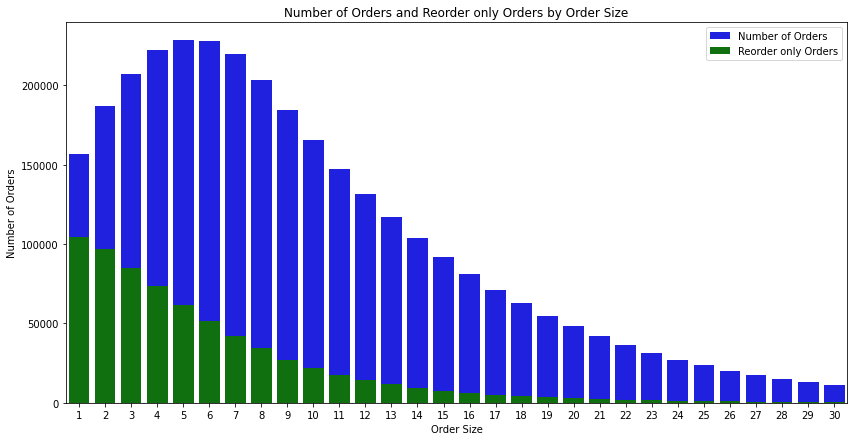

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 50 rows
df_subset = order_size_stats.iloc[:30]

# Plotting
plt.figure(figsize=(14, 7))

# Bar plot for number of orders
sns.barplot(x='Order Size', y='Number of Orders', data=df_subset, color='blue', label='Number of Orders')

# Bar plot for number of orders
sns.barplot(x='Order Size', y='Number of Reorders', data=df_subset, color='green', label='Reorder only Orders')

# Labels and Title
plt.xlabel('Order Size')
plt.ylabel('Number of Orders')
plt.title('Number of Orders and Reorder only Orders by Order Size')
plt.legend()

# Show plot
plt.show()

# Filter Reorder Only Orders

In [57]:
# Group by 'order_id' and filter out orders with any 'reordered' value of 0
orders_all_reordered = orders.groupby('order_id').filter(lambda x: x['reordered'].all())

# Save the filtered data to a new CSV file
orders_all_reordered.to_csv('orders_all_reordered.csv', index=False)

print("CSV file with 100% reordered items created.")

CSV file with 100% reordered items created.


In [75]:
# Load the data
orders_all_reordered = pd.read_csv('orders_all_reordered.csv')
products = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ProductsNew.csv')

# Count the unique order IDs
unique_order_count = orders_all_reordered['order_id'].nunique()

# Count the occurrences of each product in the reordered orders
product_reorder_counts = (orders_all_reordered['product_id'].value_counts()/unique_order_count).round(2).reset_index()
product_reorder_counts.columns = ['product_id', 'reorder_count']

print(f"Number of unique order IDs: {unique_order_count}")

print(product_reorder_counts)

Number of unique order IDs: 695006
       product_id  reorder_count
0           24852           0.11
1           13176           0.11
2           21137           0.06
3           21903           0.05
4           47209           0.05
...           ...            ...
36273       34015           0.00
36274       25604           0.00
36275       34529           0.00
36276       27965           0.00
36277       38623           0.00

[36278 rows x 2 columns]


# Incorperating NSDA API Data for most popular items

Data from Link: https://fdc.nal.usda.gov/index.html to find nutrition data for each product.
Used the API to get and store the data for processing in the notebook.

In [105]:
import requests
import pandas as pd

# USDA API URL and Key
api_url = "https://api.nal.usda.gov/fdc/v1/foods/search"
#api_key = "rbUxokVbfwPMqGKGU9VHZMz2jbWds7nECmeRqvle"
api_key = "jG5MlVf3ii60bSNwcQNcByXkedFgPgiVSCbmeemW"

# Function to fetch data from USDA API
def fetch_usda_data(query, api_key):
    params = {
        "query": query,
        "api_key": api_key,
        "dataType": ["Foundation"],
        "pageSize": 1
    }
    response = requests.get(api_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Function to extract required nutrients from the response
def extract_nutrients(data):
    nutrients = {"Water": None, "Energy": None, "Protein": None, "Total lipid (fat)": None, "Carbohydrate, by difference": None}
    if data and 'foods' in data and len(data['foods']) > 0:
        food_data = data['foods'][0]
        for nutrient in food_data.get('foodNutrients', []):
            nutrient_name = nutrient.get('nutrientName')
            if nutrient_name in nutrients:
                nutrients[nutrient_name] = nutrient.get('value')
    return nutrients

# Load the CSV file
df = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv')

# Iterate over each product and fetch data
for index, row in df.iterrows():
    product_name = row['product_name']
    api_response = fetch_usda_data(product_name, api_key)
    nutrient_data = extract_nutrients(api_response)

    # Update the DataFrame with nutrient data
    for nutrient, value in nutrient_data.items():
        df.at[index, nutrient] = value

# Save the updated DataFrame to a new CSV file
df.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv', index=False)


so exciting!!

# Making Conclusions
Now that we have added the USDA data to our products, we can make some conclusions.
We will first look at the most popular items and see if there are any similarities between them.
To do this we will use a correlation matrix to see if there are any correlations between the features of the most popular items.

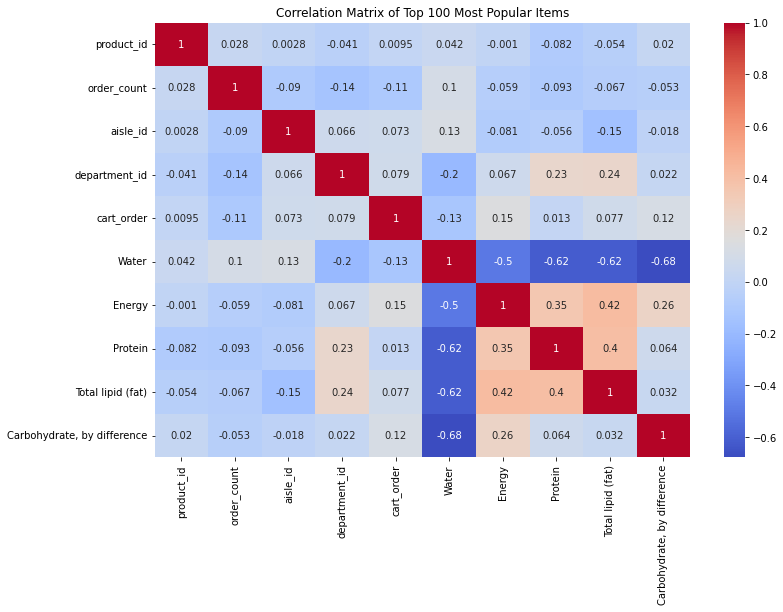

In [106]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Load the dataset
df = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv')

# Impute missing values for numerical columns
num_cols = ['Water', 'Energy', 'Protein', 'Total lipid (fat)', 'Carbohydrate, by difference']
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Standardize the numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Top 100 Most Popular Items")
plt.show()

# Random Forest Regressor

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the predictors and target variable
X = df[['Water', 'Energy', 'Protein', 'Total lipid (fat)', 'Carbohydrate, by difference']]
y = df['order_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


RMSE: 3928.245457536569
                             Importance
Protein                        0.580834
Total lipid (fat)              0.129067
Carbohydrate, by difference    0.121519
Water                          0.121505
Energy                         0.047075


In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Feature engineering (optional)
#df['reorder_ratio'] = df['reorder_count'] / df['order_count']

# Prepare the predictors and target variable
X = df.drop(['order_count', 'product_id', 'product_name'], axis=1)
y = df['order_count']

# One-hot encoding for categorical variables
categorical_features = ['aisle_id', 'department_id']
one_hot_encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

X = one_hot_encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Feature importance (adjust according to the number of features after encoding)
feature_names = one_hot_encoder.get_feature_names_out()
feature_importances = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

RMSE: 4708.227701128842
                                          Importance
remainder__cart_order                   3.838731e-01
remainder__Carbohydrate, by difference  1.860573e-01
cat__aisle_id_24                        9.023557e-02
remainder__Water                        8.494830e-02
remainder__Protein                      8.281914e-02
...                                              ...
cat__aisle_id_85                        6.799863e-08
cat__aisle_id_74                        0.000000e+00
cat__aisle_id_18                        0.000000e+00
cat__aisle_id_62                        0.000000e+00
cat__aisle_id_39                        0.000000e+00

[111 rows x 1 columns]


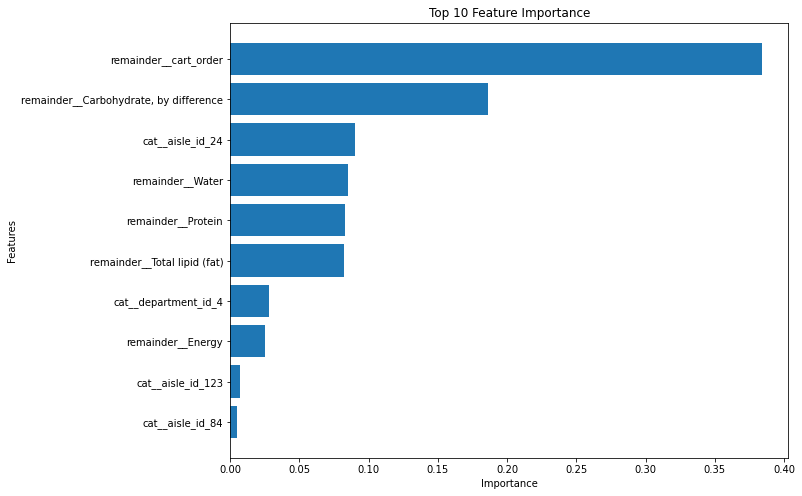

In [109]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is the DataFrame with your feature importance data
# Save to CSV
feature_importances.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/feature_importance.csv', index=True)

# Read the saved CSV file for plotting
feature_importances_csv = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/feature_importance.csv')

# Selecting the top 10 most important features
top_10_features = feature_importances_csv.nlargest(10, 'Importance')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_10_features['Unnamed: 0'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


# Initial Observations

These are three categories of features: 
1. The order history of the product. 
2. The type of product.
3. The nutrition facts. 

The most important information about the product is the order history of the product. The most important information about the product specifically is the type of product for example if the product is a fruit or vegetable. The second most important information about the product is the nutrition facts. So other than being a fruit or vegetable, the most important information about the product is the nutrition facts.

# Machine Learning 2nd Version

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
df = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv')

df.drop('product_name', axis=1, inplace=True)

# Fill missing values if necessary
df.fillna(df.mean(), inplace=True)

# Selecting features and target variable
features = ['aisle_id', 'department_id', 'cart_order', 'Water', 'Energy', 'Protein', 'Total lipid (fat)', 'Carbohydrate, by difference']
X = df[features]
y = df['order_count']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', RandomForestRegressor())  # Regression model
])

# Parameters for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
predictions = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Feature importances (optional)
feature_importances = pd.DataFrame(best_model.named_steps['regressor'].feature_importances_,
                                   index=features, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


RMSE: 5651.234571055497
                             Importance
cart_order                     0.369136
Protein                        0.230061
Carbohydrate, by difference    0.109782
aisle_id                       0.081073
Total lipid (fat)              0.074590
Water                          0.065838
department_id                  0.034771
Energy                         0.034750


# XGBoost Kaggle Machine Learning Method

https://www.kaggle.com/code/fabienvs/instacart-xgboost-starter-lb-0-3791

In [125]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load Data
# Replace 'your_data.csv' with the path to your dataset
df = pd.read_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv')

# Feature Engineering
# Assuming your DataFrame has columns like 'product_id', 'order_count', etc.
# Add your feature engineering steps here. This could include creating new features
# or modifying existing ones based on your dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Prepare the Data for Training
X = df.drop(['order_count'], axis=1)  # Drop the target variable
y = df['order_count']  # Target variable

# Drop the 'product_name' column
X_train = X_train.drop('product_name', axis=1)
X_test = X_test.drop('product_name', axis=1)

X_train = X_train.drop('product_id', axis=1)
X_test = X_test.drop('product_id', axis=1)

X_train = X_train.drop('cart_order', axis=1)
X_test = X_test.drop('cart_order', axis=1)

# Convert the datasets into DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Define parameters for the XGBoost model
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "eta": 0.1,
    "max_depth": 6,
    # Add more parameters here based on your requirements and tuning
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Prediction
y_pred = model.predict(dtest)

# Saving predictions to a CSV file
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/predictions.csv', index=False)

# Optionally, you can also print feature importance
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
for feature, score in sorted_importance:
    print(f'Feature: {feature}, Score: {score}')


Feature: aisle_id, Score: 1132.0
Feature: Water, Score: 580.0
Feature: Protein, Score: 423.0
Feature: Total lipid (fat), Score: 370.0
Feature: department_id, Score: 305.0
Feature: Energy, Score: 228.0
Feature: Carbohydrate, by difference, Score: 227.0


# Plotting the XGBoost Feature Importance

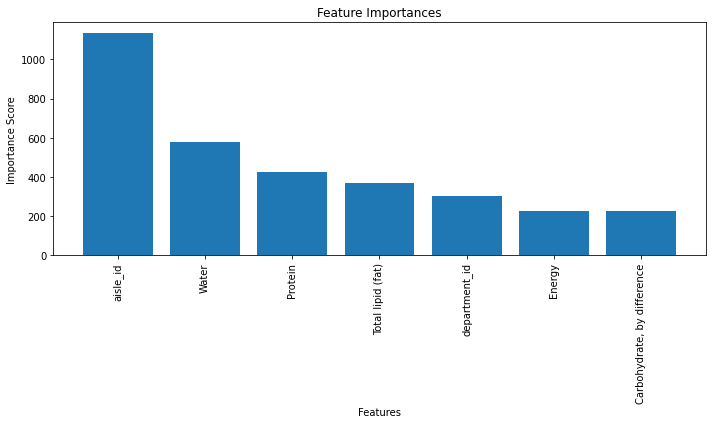

In [126]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(sorted_importance)), [val[1] for val in sorted_importance], align='center')
plt.xticks(range(len(sorted_importance)), [val[0] for val in sorted_importance])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.savefig('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/feature_importances.png')
plt.show()

# Metrics for success

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Root Mean Squared Error (RMSE): 4359.868774341918
Mean Absolute Error (MAE): 1863.4260069274903
R-squared: -2.7636008822090186


# Conclusions

In [135]:
import pandas as pd

# Load the CSV files
file1 = '/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/3ProductsNew.csv' # Reorder Popularity Rank File
file2 = '/Users/tannermartz/Documents/GitHub/tmartzDS/Output/ReOrdersOnly/top_100_products_with_reorder_counts.csv' # First Time Order Popularity Rank File

# Read the first 100 rows from each file
df1 = pd.read_csv(file1).head(100)
df2 = pd.read_csv(file2).head(100)

# Add a rank column based on the existing order in each file
df1['rank_file1'] = range(1, len(df1) + 1)
df2['rank_file2'] = range(1, len(df2) + 1)

# Merge the two dataframes on the item identifier
merged_df = df1.merge(df2, on='product_name', how='inner')

# Calculate the difference in rank
merged_df['rank_difference'] = merged_df['rank_file1'] - merged_df['rank_file2']
merged_df['abs_rank_difference'] = merged_df['rank_difference']

# Sort by absolute rank difference and select top 10 largest differences
largest_diff = merged_df.sort_values(by='abs_rank_difference', ascending=False).head(10)

# Sort by absolute rank difference and select top 10 smallest differences
smallest_diff = merged_df.sort_values(by='abs_rank_difference', ascending=True).head(10)

# Display results
print("(Pursuaded into buying) Top 10 Products with Largest Rank Difference:")
print(largest_diff[['product_name', 'rank_file1', 'rank_file2', 'rank_difference']])

print("\n(Desuaded from buying) Top 10 Products with Smallest Rank Difference:")
print(smallest_diff[['product_name', 'rank_file1', 'rank_file2', 'rank_difference']])

# Optionally, save the results to new CSV files
#largest_diff.to_csv('path_to_save_largest_rank_differences.csv', index=False)
#smallest_diff.to_csv('path_to_save_smallest_rank_differences.csv', index=False)
merged_df.to_csv('/Users/tannermartz/Documents/GitHub/tmartzDS/Output/reorder_difference', index=False)


(Pursuaded into buying) Top 10 Products with Largest Rank Difference:
                         product_name  rank_file1  rank_file2  rank_difference
83   Organic Lacinato (Dinosaur) Kale          99          69               30
76                Organic Ginger Root          84          56               28
62                  Organic Red Onion          64          37               27
74                  Green Bell Pepper          79          52               27
73                        Red Peppers          78          51               27
77                 Small Hass Avocado          86          60               26
65      Organic Italian Parsley Bunch          68          43               25
57                   Organic Cilantro          59          34               25
75  Boneless Skinless Chicken Breasts          80          58               22
36             Organic Grape Tomatoes          38          19               19

(Desuaded from buying) Top 10 Products with Smallest Rank Di